In [40]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [41]:
df = pd.read_csv('survey.csv', sep=';')
df

,Gender,Age,KmBefore,KgBefore,TimeBefore,Medicine1,Medicine2,Medicine3,KmAfter,KgAfter,TimeAfter,SideEffects
0,F,32,4.06,74.7,41.2,No,No,No,4.37,91.8,61.1,N
1,M,37,3.96,76.3,43.9,Yes,Yes,No,3.09,89.6,69.7,N
2,M,43,3.80,91.7,47.9,Yes,No,No,6.26,92.7,49.8,N
3,F,26,5.17,75.4,59.6,No,No,No,5.81,89.1,60.9,N
4,F,36,3.72,77.0,54.9,No,Yes,Yes,7.80,91.7,60.7,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
995,M,39,5.69,77.5,39.3,No,No,Yes,5.41,85.8,61.0,Y
996,F,35,4.57,93.2,50.2,Yes,Yes,No,5.86,96.6,64.4,N
997,F,36,2.72,72.3,53.8,No,Yes,No,2.63,92.8,68.9,Y
998,M,32,3.92,98.7,56.2,No,Yes,No,6.31,86.0,62.3,N


## Data Preprocessing

In [42]:
df['KmBefore'] = round(df['KmBefore'] * 1000, 0)
df['KmAfter'] = round(df['KmAfter'] * 1000, 0)
df['DistDiff'] = df['KmAfter'] - df['KmBefore'] 
df = df.rename(columns={'KmBefore':'MeterBefore',
                                        'KmAfter':'MeterAfter'})
df

,Gender,Age,MeterBefore,KgBefore,TimeBefore,Medicine1,Medicine2,Medicine3,MeterAfter,KgAfter,TimeAfter,SideEffects,DistDiff
0,F,32,4060.0,74.7,41.2,No,No,No,4370.0,91.8,61.1,N,310.0
1,M,37,3960.0,76.3,43.9,Yes,Yes,No,3090.0,89.6,69.7,N,-870.0
2,M,43,3800.0,91.7,47.9,Yes,No,No,6260.0,92.7,49.8,N,2460.0
3,F,26,5170.0,75.4,59.6,No,No,No,5810.0,89.1,60.9,N,640.0
4,F,36,3720.0,77.0,54.9,No,Yes,Yes,7800.0,91.7,60.7,Y,4080.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,M,39,5690.0,77.5,39.3,No,No,Yes,5410.0,85.8,61.0,Y,-280.0
996,F,35,4570.0,93.2,50.2,Yes,Yes,No,5860.0,96.6,64.4,N,1290.0
997,F,36,2720.0,72.3,53.8,No,Yes,No,2630.0,92.8,68.9,Y,-90.0
998,M,32,3920.0,98.7,56.2,No,Yes,No,6310.0,86.0,62.3,N,2390.0


In [43]:
speed_before = round(df['MeterBefore']/df['TimeBefore'], 2)
speed_after = round(df['MeterAfter']/df['TimeAfter'], 2)
df['SpeedBefore'] = speed_before
df['SpeedAfter'] = speed_after
df['WeightDiff'] = round(df['KgAfter'] - df['KgBefore'])
df['ImprovedDist'] = df['MeterAfter'] > df['MeterBefore']
df

,Gender,Age,MeterBefore,KgBefore,TimeBefore,Medicine1,Medicine2,Medicine3,MeterAfter,KgAfter,TimeAfter,SideEffects,DistDiff,SpeedBefore,SpeedAfter,WeightDiff,ImprovedDist
0,F,32,4060.0,74.7,41.2,No,No,No,4370.0,91.8,61.1,N,310.0,98.54,71.52,17.0,True
1,M,37,3960.0,76.3,43.9,Yes,Yes,No,3090.0,89.6,69.7,N,-870.0,90.21,44.33,13.0,False
2,M,43,3800.0,91.7,47.9,Yes,No,No,6260.0,92.7,49.8,N,2460.0,79.33,125.70,1.0,True
3,F,26,5170.0,75.4,59.6,No,No,No,5810.0,89.1,60.9,N,640.0,86.74,95.40,14.0,True
4,F,36,3720.0,77.0,54.9,No,Yes,Yes,7800.0,91.7,60.7,Y,4080.0,67.76,128.50,15.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,M,39,5690.0,77.5,39.3,No,No,Yes,5410.0,85.8,61.0,Y,-280.0,144.78,88.69,8.0,False
996,F,35,4570.0,93.2,50.2,Yes,Yes,No,5860.0,96.6,64.4,N,1290.0,91.04,90.99,3.0,True
997,F,36,2720.0,72.3,53.8,No,Yes,No,2630.0,92.8,68.9,Y,-90.0,50.56,38.17,20.0,False
998,M,32,3920.0,98.7,56.2,No,Yes,No,6310.0,86.0,62.3,N,2390.0,69.75,101.28,-13.0,True


## Normality Check

In [44]:
# To perform paired t-test, I must first verify the distance difference before and after treatment
# is normally distributed
# The treatment combinations as in [Medicine1, Medicine2, Medicine3] are:
# [0, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 1, 0], [1, 0, 1], [0, 1, 1], [1, 1, 1]
def treatment_check(con1, con2, con3):
    res = df[(df['Medicine1'] == con1) & (df['Medicine2'] == con2) & (df['Medicine3'] == con3)]
    res = res[['Medicine1', 'Medicine2', 'Medicine3', 'MeterBefore', 'MeterAfter', 'DistDiff']]
    return res
no_med = treatment_check('No', 'No', 'No')
med1 = treatment_check('Yes', 'No', 'No')
med2 = treatment_check('No', 'Yes', 'No')
med3 = treatment_check('No', 'No', 'Yes')
med1_2 = treatment_check('Yes', 'Yes', 'No')
med1_3 = treatment_check('Yes', 'No', 'Yes')
med2_3 = treatment_check('No', 'Yes', 'Yes')
all_med = treatment_check('Yes', 'Yes', 'Yes')

## Shapiro-Wilk Test and QQ Plot

In [45]:
from scipy.stats import shapiro
# Shapiro-Wilk test function
def shapiro_test(df, column):
    stat, p = shapiro(df[column])
    alpha = 0.05
    print(f"Shapiro-Wilk test: statistic={stat:.3f}, p-value={p:.3f}")
    if p > alpha:
        print("Sample looks Gaussian (fail to reject H0)")
    else:
        print("Sample does not look Gaussian (reject H0)")

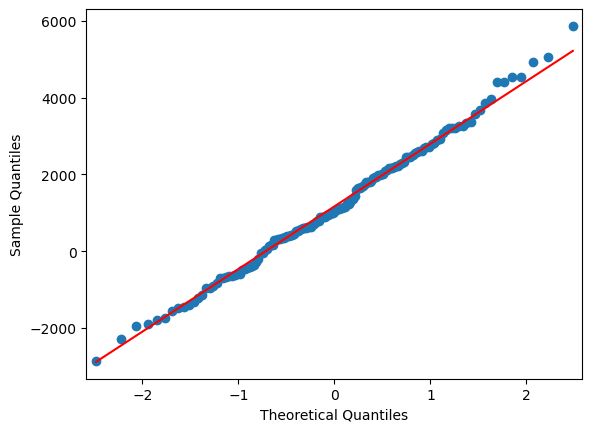

Shapiro-Wilk test: statistic=0.995, p-value=0.852
Sample looks Gaussian (fail to reject H0)


In [46]:
import statsmodels.api as sm
# Verifying normal distribution using QQ plots and Shapiro-Wilk test
# create a QQ-plot
sm.qqplot(no_med['DistDiff'], line='s')
# show the plot
plt.show()
shapiro_test(no_med, 'DistDiff')

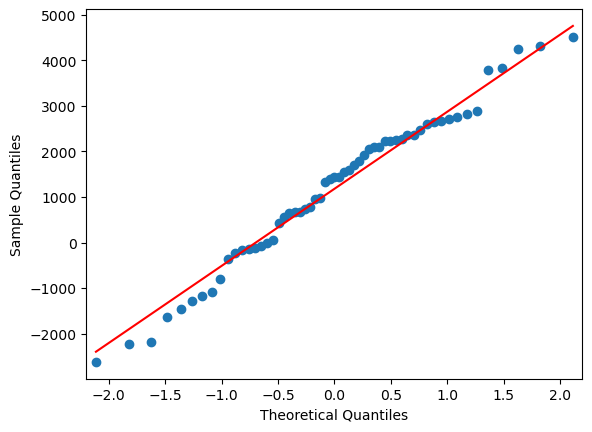

Shapiro-Wilk test: statistic=0.977, p-value=0.365
Sample looks Gaussian (fail to reject H0)


In [47]:
# create a QQ-plot
sm.qqplot(med1['DistDiff'], line='s')
# show the plot
plt.show()
shapiro_test(med1, 'DistDiff')

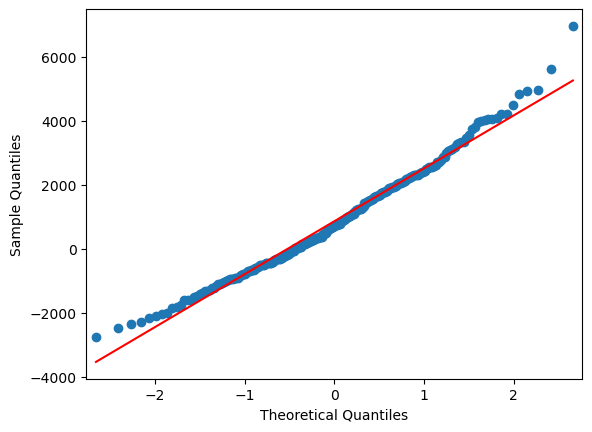

Shapiro-Wilk test: statistic=0.985, p-value=0.009
Sample does not look Gaussian (reject H0)


In [48]:
# create a QQ-plot
sm.qqplot(med2['DistDiff'], line='s')
# show the plot
plt.show()
shapiro_test(med2, 'DistDiff')

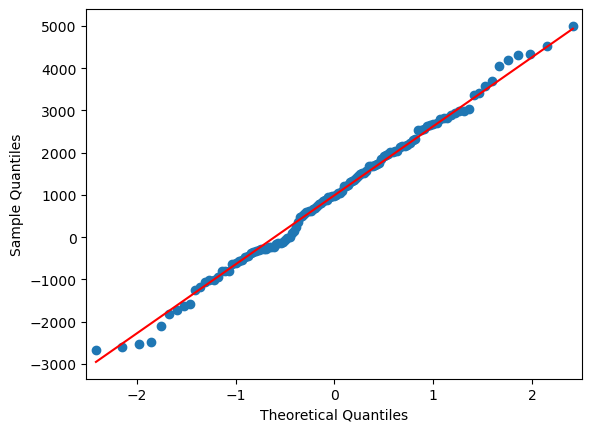

Shapiro-Wilk test: statistic=0.992, p-value=0.731
Sample looks Gaussian (fail to reject H0)


In [49]:
# create a QQ-plot
sm.qqplot(med3['DistDiff'], line='s')
# show the plot
plt.show()
shapiro_test(med3, 'DistDiff')

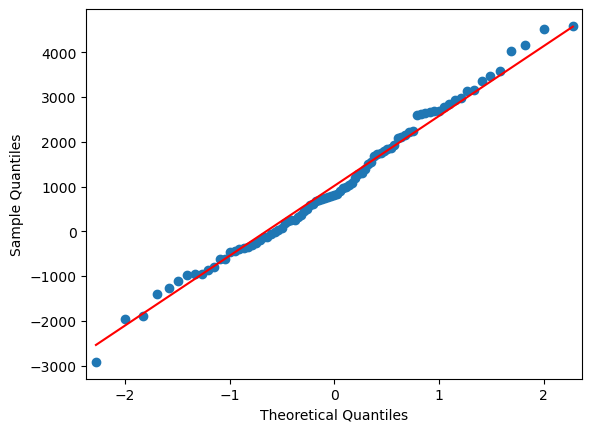

Shapiro-Wilk test: statistic=0.990, p-value=0.732
Sample looks Gaussian (fail to reject H0)


In [50]:
# create a QQ-plot
sm.qqplot(med1_2['DistDiff'], line='s')
# show the plot
plt.show()
shapiro_test(med1_2, 'DistDiff')

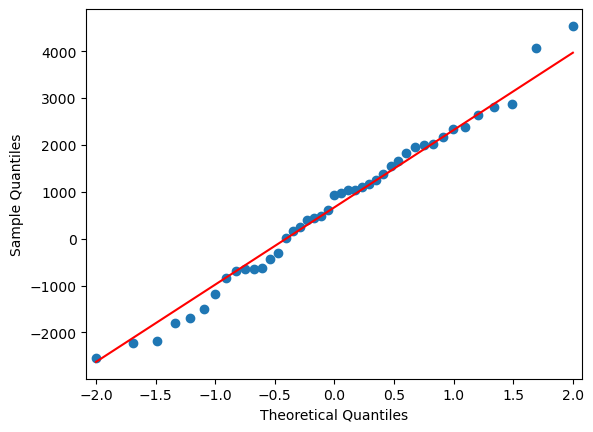

Shapiro-Wilk test: statistic=0.985, p-value=0.854
Sample looks Gaussian (fail to reject H0)


In [51]:
# create a QQ-plot
sm.qqplot(med1_3['DistDiff'], line='s')
# show the plot
plt.show()
shapiro_test(med1_3, 'DistDiff')

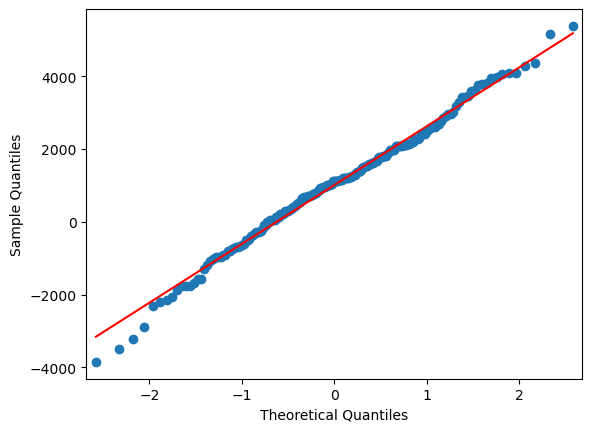

Shapiro-Wilk test: statistic=0.993, p-value=0.448
Sample looks Gaussian (fail to reject H0)


In [52]:
# create a QQ-plot
sm.qqplot(med2_3['DistDiff'], line='s')
# show the plot
plt.show()
shapiro_test(med2_3, 'DistDiff')

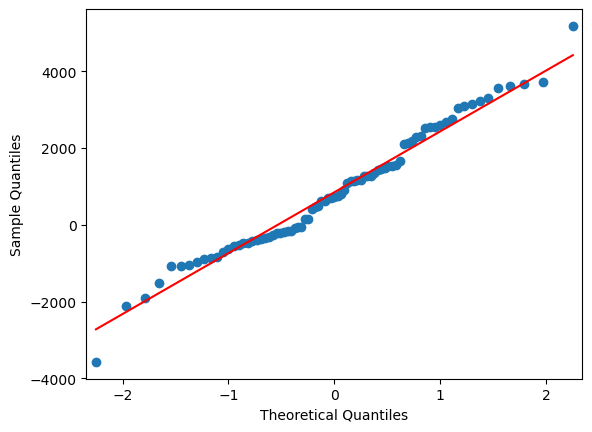

Shapiro-Wilk test: statistic=0.983, p-value=0.364
Sample looks Gaussian (fail to reject H0)


In [53]:
# create a QQ-plot
sm.qqplot(all_med['DistDiff'], line='s')
# show the plot
plt.show()
shapiro_test(all_med, 'DistDiff')

## Paired T-Test

In [54]:
# All Medicine Combinations' DistDiff are normally distributed beside med2
import scipy.stats as stats
# Paired T-test
def ttest(t_statistic, p_value):
    if p_value/2 < 0.05 and t_statistic > 0:
        print("The mean of Distance After IS significantly more than the mean of Distance Before.")
    elif p_value/2 < 0.05 and t_statistic < 0:
        print("The mean of Distance After IS significantly less than the mean of Distance Before.")
    elif p_value >= 0.05:
        print("The mean of Distance After is NOT significantly different from the mean of Distance Before.")
    print(t_statistic, p_value)

In [55]:
t_statistic0, p_value0 = stats.ttest_rel(no_med['MeterAfter'], no_med['MeterBefore'])
ttest(t_statistic0, p_value0)

The mean of Distance After IS significantly more than the mean of Distance Before.
8.809068776646102 2.671730394661055e-15


In [56]:
t_statistic1, p_value1 = stats.ttest_rel(med1['MeterAfter'], med1['MeterBefore'])
ttest(t_statistic1, p_value1)

The mean of Distance After IS significantly more than the mean of Distance Before.
5.215411377316477 2.755117706939002e-06


In [57]:
t_statistic3, p_value3 = stats.ttest_rel(med3['MeterAfter'], med3['MeterBefore'])
ttest(t_statistic3, p_value3)

The mean of Distance After IS significantly more than the mean of Distance Before.
6.754087038056204 4.960641271926078e-10


In [58]:
t_statistic12, p_value12 = stats.ttest_rel(med1_2['MeterAfter'], med1_2['MeterBefore'])
ttest(t_statistic12, p_value12)

The mean of Distance After IS significantly more than the mean of Distance Before.
6.038271948079323 3.8469860764249725e-08


In [59]:
t_statistic13, p_value13 = stats.ttest_rel(med1_3['MeterAfter'], med1_3['MeterBefore'])
ttest(t_statistic13, p_value13)

The mean of Distance After IS significantly more than the mean of Distance Before.
2.626941122878838 0.011974842692865657


In [60]:
t_statistic23, p_value23 = stats.ttest_rel(med2_3['MeterAfter'], med2_3['MeterBefore'])
ttest(t_statistic23, p_value23)

The mean of Distance After IS significantly more than the mean of Distance Before.
8.811945605339648 6.112344101676489e-16


In [61]:
t_statisticX, p_valueX = stats.ttest_rel(all_med['MeterAfter'], all_med['MeterBefore'])
ttest(t_statisticX, p_valueX)

The mean of Distance After IS significantly more than the mean of Distance Before.
4.787992080017722 7.604297777948139e-06


## Decision Tree

In [62]:
#input attributes and target classifier
inputs = df[['Gender', 'Age', 'Medicine1', 'Medicine2', 'Medicine3', 'SideEffects', 'WeightDiff']]
target = df['ImprovedDist']

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
inputs['Medicine1'] = le.fit_transform(inputs['Medicine1'])
inputs['Medicine2'] = le.fit_transform(inputs['Medicine2'])
inputs['Medicine3'] = le.fit_transform(inputs['Medicine3'])
inputs['Gender'] = le.fit_transform(inputs['Gender'])
inputs['SideEffects'] = le.fit_transform(inputs['SideEffects'])
inputs

/var/folders/82/s5dmzykj59x6mr41xc11x5nr0000gn/T/ipykernel_917/3287342615.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs['Medicine1'] = le.fit_transform(inputs['Medicine1'])
/var/folders/82/s5dmzykj59x6mr41xc11x5nr0000gn/T/ipykernel_917/3287342615.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs['Medicine2'] = le.fit_transform(inputs['Medicine2'])
/var/folders/82/s5dmzykj59x6mr41xc11x5nr0000gn/T/ipykernel_917/3287342615.py:5: SettingWithCopyWarning: 
A value is trying to be set on a co

,Gender,Age,Medicine1,Medicine2,Medicine3,SideEffects,WeightDiff
0,0,32,0,0,0,0,17.0
1,1,37,1,1,0,0,13.0
2,1,43,1,0,0,0,1.0
3,0,26,0,0,0,0,14.0
4,0,36,0,1,1,1,15.0
...,...,...,...,...,...,...,...
995,1,39,0,0,1,1,8.0
996,0,35,1,1,0,0,3.0
997,0,36,0,1,0,1,20.0
998,1,32,0,1,0,0,-13.0


In [64]:
#split training data and testing data
from sklearn.model_selection import train_test_split
x = inputs.copy()
y = target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20) 

In [65]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=4)
#get the decision tree from training data
model = model.fit(x_train, y_train)

In [66]:
predictions = model.predict(x_test)
predictions

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,

In [67]:
#accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.71

In [68]:
#confusion matrix of the model
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=[0, 1])

array([[  3,  43],
       [ 15, 139]])

In [69]:
#full classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['No Improvement', 'Improvement']))

                precision    recall  f1-score   support

No Improvement       0.17      0.07      0.09        46
   Improvement       0.76      0.90      0.83       154

      accuracy                           0.71       200
     macro avg       0.47      0.48      0.46       200
  weighted avg       0.63      0.71      0.66       200



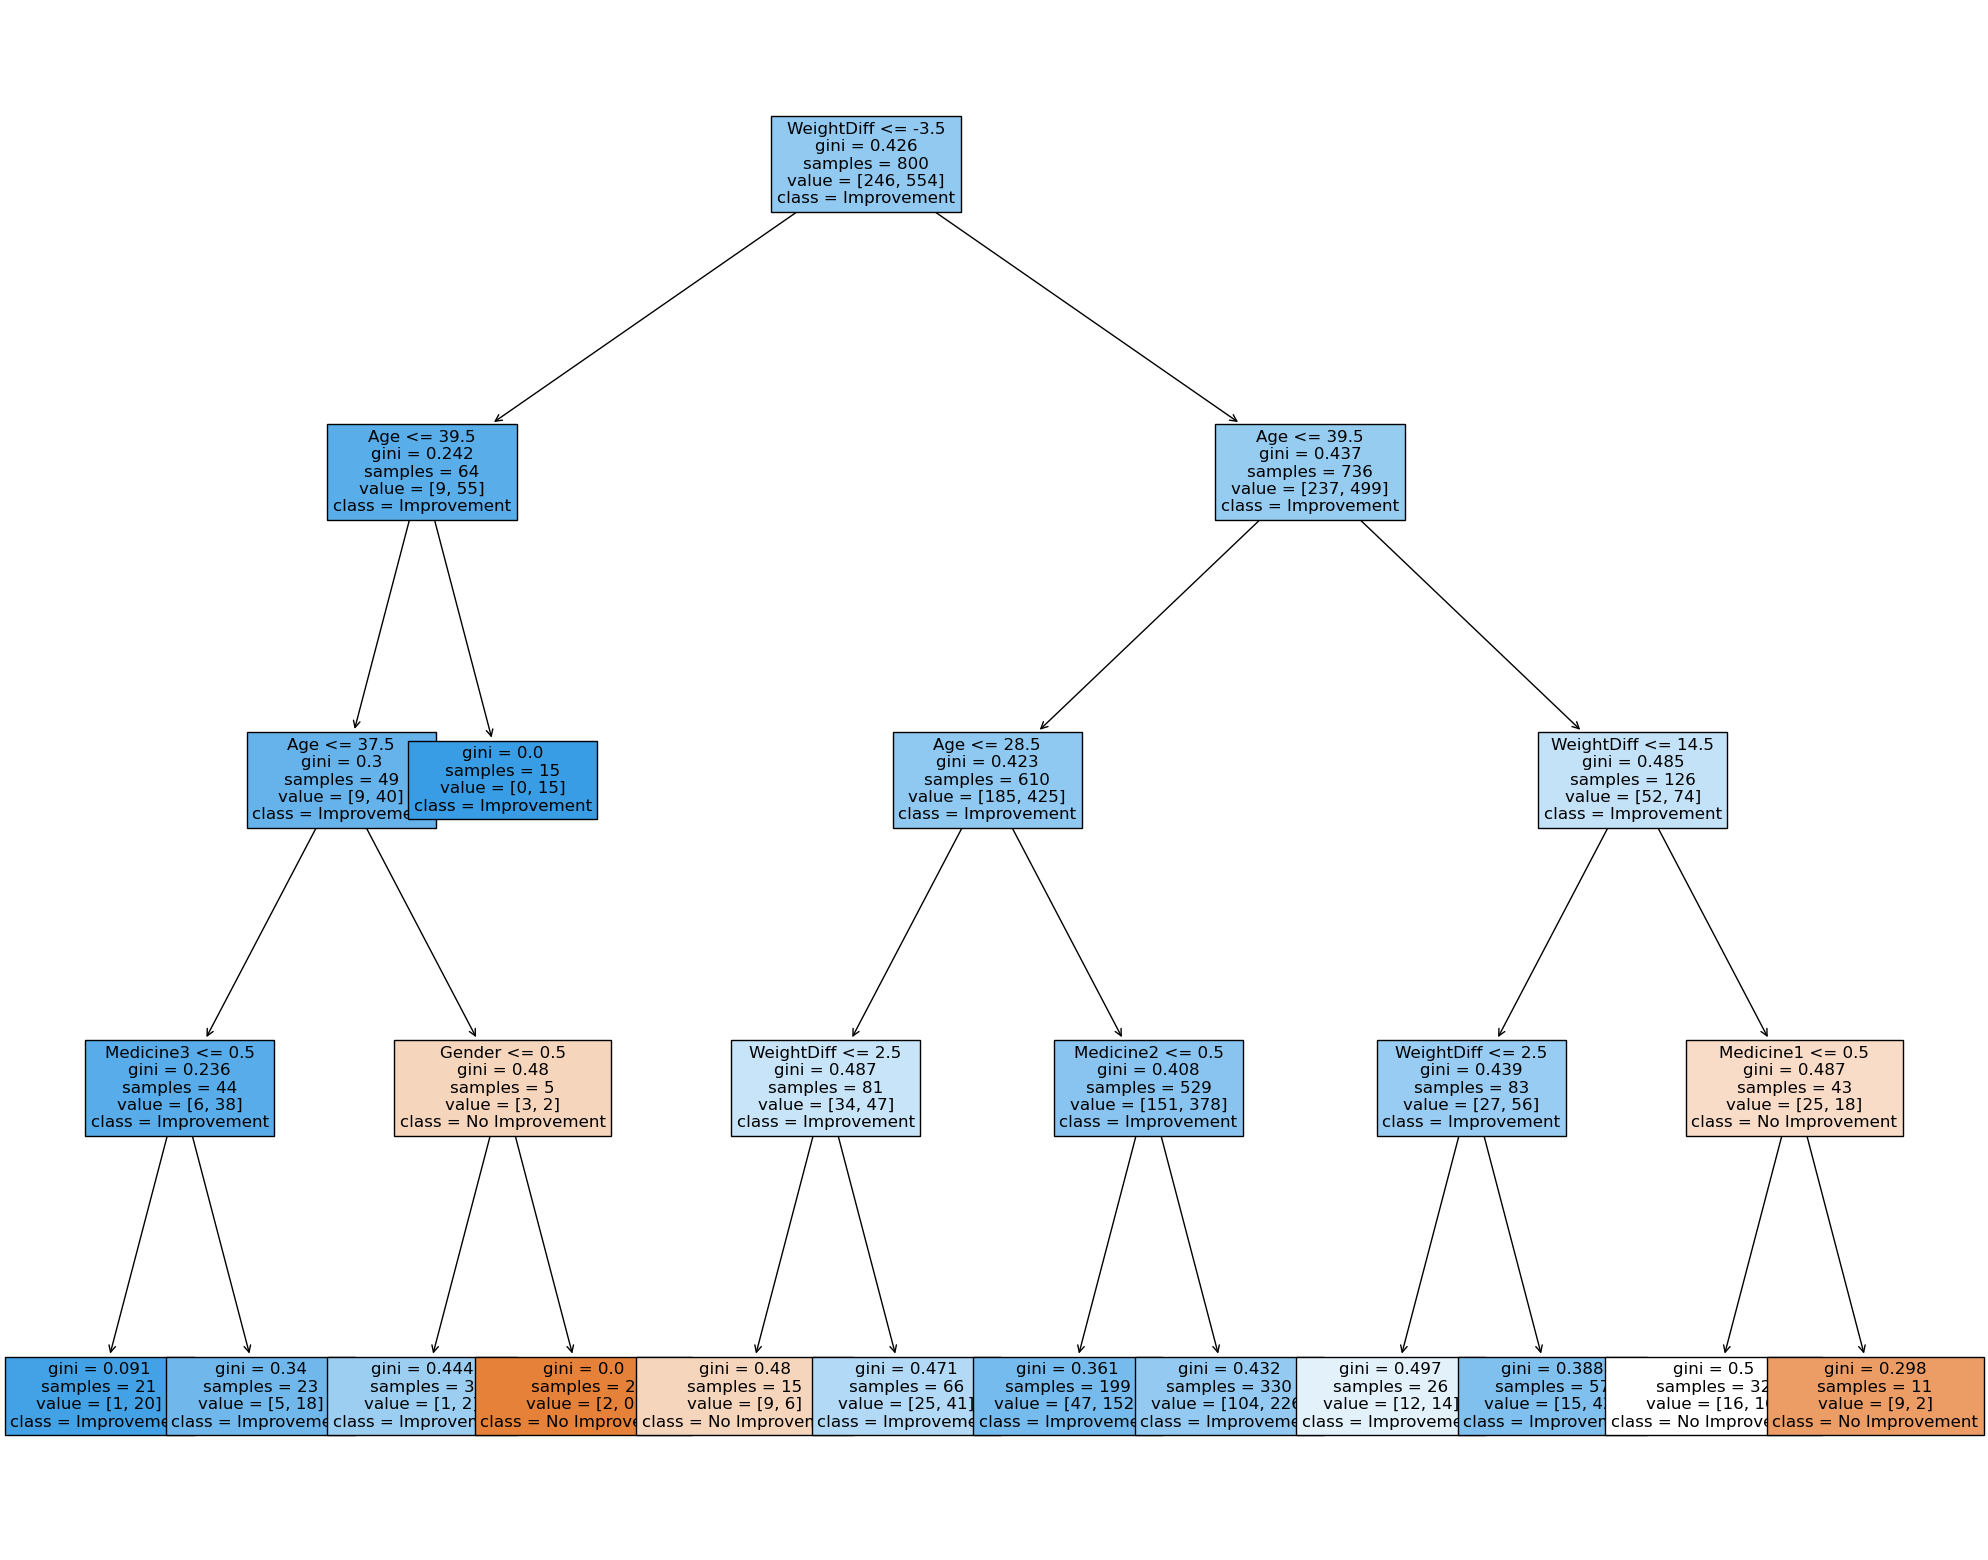

In [70]:
feature_names = x.columns
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25, 20))
_=tree.plot_tree(model,
                feature_names=feature_names,
                class_names={0:'No Improvement', 1:'Improvement'},
                filled=True,
                fontsize=12)